## 1번

데이터 확인 및 전처리

1.1 데이터 EDA 및 시각화

1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

1.6 모델 최적화 방안에 대해 구체적으로 설명하라

데이터 설명

성별(sex) 바이너리 : ‘F’ - 여성 또는 ‘M’ - 남성

나이(age) 숫자: 15 - 22

부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 ‘A’: 별거

엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육

아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육

주보호자(guardian) 명목형 : ‘어머니’, ‘아버지’ 또는 ‘기타’

등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상

학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상

학고횟수(failures) 숫자 : 1, 2, 3 else 4

자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)

가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


In [3]:
# 1.1 데이터 EDA및 시각화
df.info()
# info()함수로 데이터 타입 확인 결과 int로 표현됐지만 age변수를 제외한 모든 변수가 명목형 변수로 확인됐다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


<BarContainer object of 34 artists>

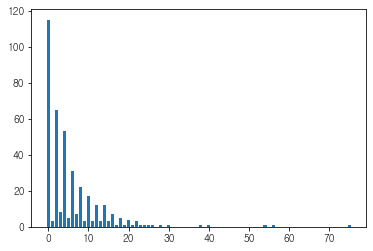

In [4]:
plt.bar(df['absences'].value_counts().index,df['absences'].value_counts().values)

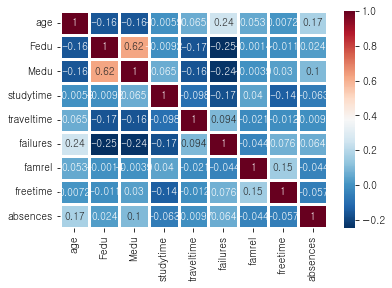

In [5]:
df_cor = df.corr(method='pearson')
sns.heatmap(df_cor,
           xticklabels=df_cor.columns,
           yticklabels=df_cor.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=3)
plt.show()

In [10]:
df_columns = df.columns.difference(['age','absences'])

Text(0.5, 1.0, 'traveltime')

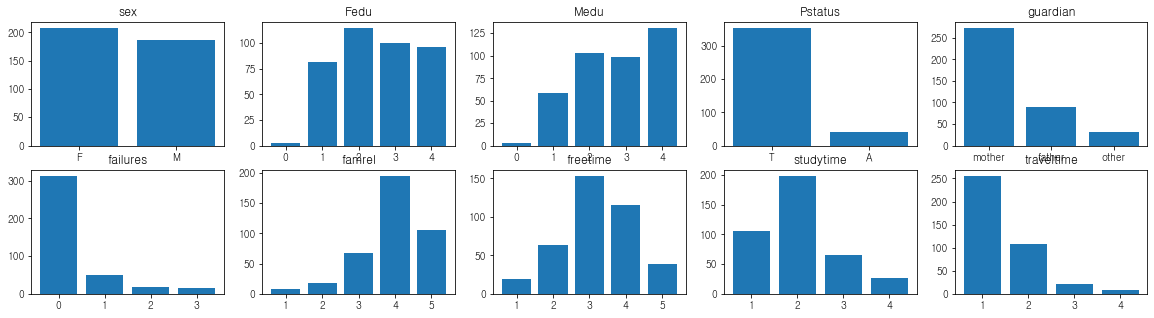

In [11]:
fig,axs = plt.subplots(2,5,figsize=(20,5))
axs[0][0].bar(df['sex'].value_counts().index,df['sex'].value_counts().values)
axs[0][0].set_title('sex')
axs[0][1].bar(df['Fedu'].value_counts().index,df['Fedu'].value_counts().values)
axs[0][1].set_title('Fedu')
axs[0][2].bar(df['Medu'].value_counts().index,df['Medu'].value_counts().values)
axs[0][2].set_title('Medu')
axs[0][3].bar(df['Pstatus'].value_counts().index,df['Pstatus'].value_counts().values)
axs[0][3].set_title('Pstatus')
axs[0][4].bar(df['guardian'].value_counts().index,df['guardian'].value_counts().values)
axs[0][4].set_title('guardian')

axs[1][0].bar(df['failures'].value_counts().index,df['failures'].value_counts().values)
axs[1][0].set_title('failures')
axs[1][1].bar(df['famrel'].value_counts().index,df['famrel'].value_counts().values)
axs[1][1].set_title('famrel')
axs[1][2].bar(df['freetime'].value_counts().index,df['freetime'].value_counts().values)
axs[1][2].set_title('freetime')
axs[1][3].bar(df['studytime'].value_counts().index,df['studytime'].value_counts().values)
axs[1][3].set_title('studytime')
axs[1][4].bar(df['traveltime'].value_counts().index,df['traveltime'].value_counts().values)
axs[1][4].set_title('traveltime')

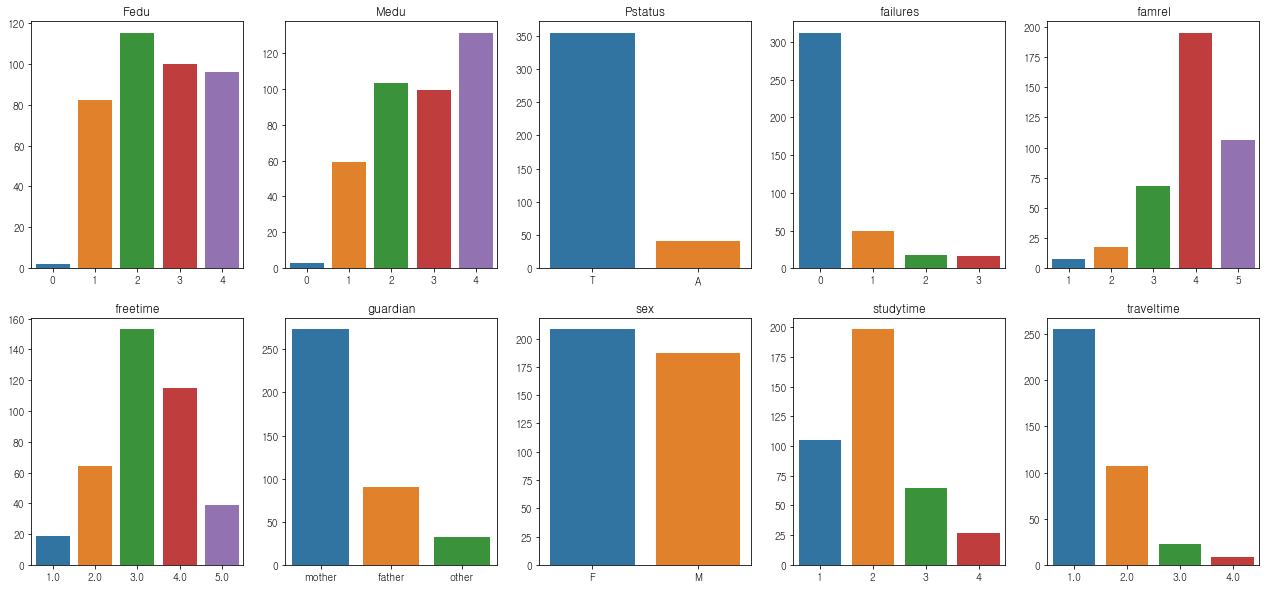

In [12]:
fig,axs = plt.subplots(2,5,figsize=(22,10))
for i in range(5):
    sns.barplot(df[df_columns[i]].value_counts().index,df[df_columns[i]].value_counts().values, ax= axs[0][i])
    axs[0][i].set_title(df_columns[i])
for i in range(5):
    sns.barplot(df[df_columns[i+5]].value_counts().index,df[df_columns[i+5]].value_counts().values, ax= axs[1][i])
    axs[1][i].set_title(df_columns[i+5])
plt.show()

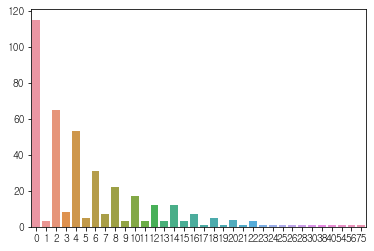

In [13]:
sns.barplot(df['absences'].value_counts().index, df['absences'].value_counts().values)
plt.show()

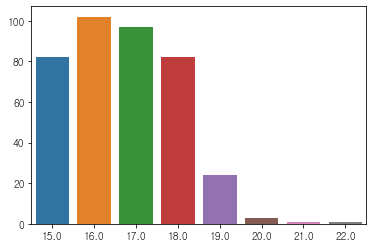

In [14]:
sns.barplot(df['age'].value_counts().index, df['age'].value_counts().values)
plt.show()

In [15]:
df.isna().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

In [16]:
df.describe()

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


### 독립변수 상관관계 설명
-  상관계수(heatmap): 독립변수끼리의 상관계수를 확인해본 결과 다중공선성을 걱정할만큼(0.9)이상의 상관성이 보이지 않았다. 

###  결측치 존재여부
- 전체 데이터에서 age, freetime, traveltime변수에서 결측치가 존재한다. age변수는 int변수로 중앙값으로 대체가 가능하고, freetime, traveltime은 범주형 변수로 최빈값으로 대체할 수 있을것으로 보인다.

### 종속변수 분포 설명
- 종속변수의 분포는 정규성을 띄지 않는다

### 종속변수와 독립변수의 상관관계 설명
- 종속변수 absences와의 상관계수를 확인해 봤을 때, 독립 변수에는서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어 보인다.

In [19]:
# 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라
df['age']=df['age'].fillna(df['age'].median())
df['freetime']=df['freetime'].fillna(df['freetime'].mode()[0])
df['traveltime']=df['traveltime'].fillna(df['traveltime'].mode()[0])

In [20]:
df.isna().sum()

sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64

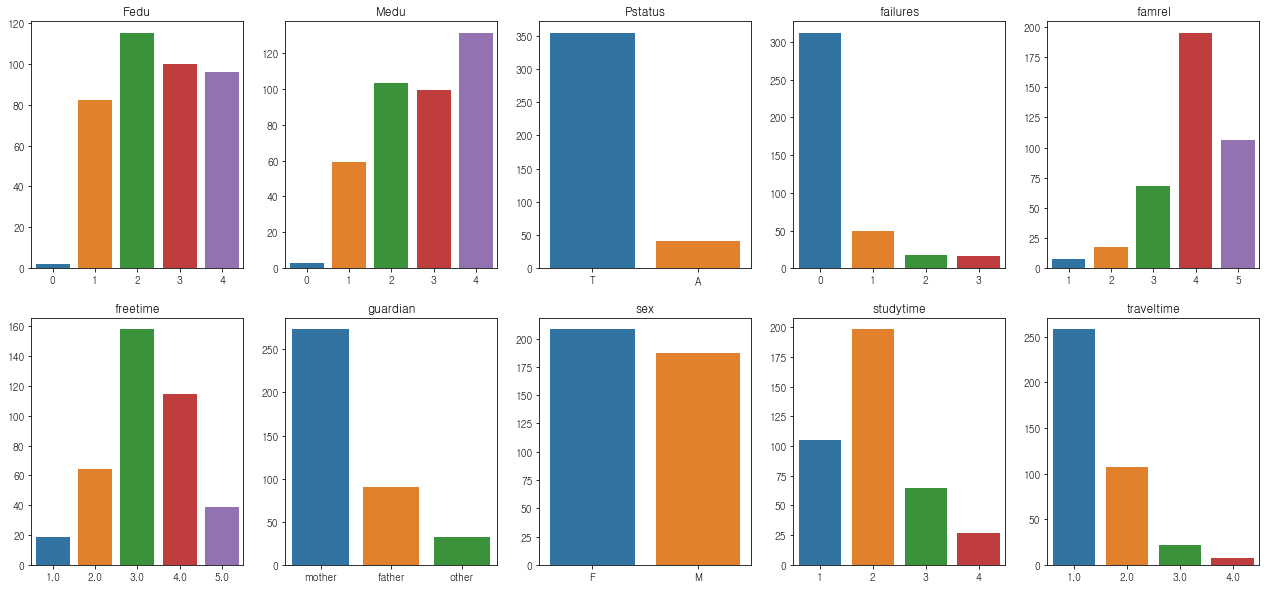

In [21]:
fig,axs = plt.subplots(2,5,figsize=(22,10))
for i in range(5):
    sns.barplot(df[df_columns[i]].value_counts().index,df[df_columns[i]].value_counts().values, ax= axs[0][i])
    axs[0][i].set_title(df_columns[i])
for i in range(5):
    sns.barplot(df[df_columns[i+5]].value_counts().index,df[df_columns[i+5]].value_counts().values, ax= axs[1][i])
    axs[1][i].set_title(df_columns[i+5])
plt.show()

In [22]:
df

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,17.0,T,3,3,father,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,A,2,2,other,2,1.0,2,5,5.0,11
391,M,17.0,T,1,3,mother,1,2.0,0,2,4.0,3
392,M,21.0,T,1,1,other,1,1.0,3,5,5.0,3
393,M,18.0,T,2,3,mother,1,3.0,0,4,4.0,0


## 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

- 결측치 처리 후 데이터의 분포를 다시 확인해본 결과 큰 변화는 없다. 기존 데이터에서 결측치의 갯수가 적었기 때문이라고 생각된다
- 데이터의 명목형 변수를 pd.get_dummies함수로 전처리 하겠다. 데이터 셋에서 명목형 변수는 sex와 guardian, Pstatus변수가 있다. 
- 나머지 변수는 순위형 변수로 변수 별로 구간을 정했고 숫자가 높을수록 높은 값을 갖는 의미가 같으므로 모델링을 진행하기 전 순위형 변수에 대해서는 더미변수 생성을 하지 않겠다.

In [23]:
# 추가 전처리
# 데이터의 명목형 변수를 pd.get_dummies함수로 전처리 하겠다. 이유는 명목형 변수의 경우 수학적 연산으로 모델을 생성하는 대부분의 분석도구에서 사용이 불가능하기 때문이다.
df = pd.get_dummies(df, columns=['sex','Pstatus','guardian'])
df

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences,sex_F,sex_M,Pstatus_A,Pstatus_T,guardian_father,guardian_mother,guardian_other
0,18.0,4,4,2,2.0,0,4,3.0,6,1,0,1,0,0,1,0
1,17.0,1,1,2,1.0,0,5,3.0,4,1,0,0,1,1,0,0
2,15.0,1,1,2,1.0,3,4,3.0,10,1,0,0,1,0,1,0
3,15.0,2,4,3,1.0,0,3,2.0,2,1,0,0,1,0,1,0
4,17.0,3,3,2,1.0,0,4,3.0,4,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2,2,2,1.0,2,5,5.0,11,0,1,1,0,0,0,1
391,17.0,1,3,1,2.0,0,2,4.0,3,0,1,0,1,0,1,0
392,21.0,1,1,1,1.0,3,5,5.0,3,0,1,0,1,0,0,1
393,18.0,2,3,1,3.0,0,4,4.0,0,0,1,0,1,0,1,0


## 1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

- 선정모델: SVM, xgboost
- 선정이유: 해당 데이터의 종속변수는 연속형이므로 회귀분석이 적합하다. 회귀분석에서 다중공선성의 문제를 해결하는 것이 중요한데 svm은 커널트릭을 통해, xgboost는 트리모델을 통해 다중공선성을 해결할 수 있다.

## 1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('absences',axis=1)
y = df[['absences']]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=1)

In [30]:
# SVR

clf = SVR()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))
print("R2: ", clf.score(X_test, y_test))

RMSE: 6.8200741549767345
R2:  -0.13472165843693795


In [31]:
clf = XGBRegressor()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
print('R2: ', clf.score(X_test, y_test))

RMSE:  13.546779566900023
R2:  -3.4769606665873463


## 1.5 모델 최적화 방안에 대해 구체적으로 설명하라
- gridSearch를 활용해 다양한 파라미터를 수정해가면서 최고의 성능을 내는 모델을 만들 수 있다. 
- SVR 모델의 경우 C, gamma등 XGB모델의 경우 max_depth, min_samples_split 등의 주요 파라미터가 있고 gridSearch를 활용해 이런 주요 파라미터들을 수정해가며 모델 최적화를 할 수 있다.

# 통계분석

## 2번

광고횟수와 광고비에 따른 매출액의 데이터이다

2.1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

2.2 회귀식이 유의한지 판단

In [32]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


In [34]:
# 2.1 광고빈 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
df= pd.get_dummies(df, columns=['광고비'])
df

,광고횟수,매출액,광고비_낮음,광고비_높음
0,2,15,1,0
1,3,16,1,0
2,4,17,1,0
3,4,18,0,1
4,5,20,0,1
5,6,22,0,1
6,7,24,1,0
7,9,26,0,1
8,11,28,0,1
9,12,29,1,0


In [37]:
import statsmodels.formula.api as smf

lr = smf.ols(formula='매출액~광고횟수+광고비_낮음+광고비_높음',data=df)
result= lr.fit()
result.summary()

# 2.2 회귀식이 유의한지 판단
# 검정결과 p-value가 0.05보다 작으므로 회귀식이 유의하다고 할 수 있다.
# 또한 각 변수의 p-value도 모두 0.05보다 작으므로 각 변수의 회귀계수 또한 유의하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           9.96e-08
Time:                        00:00:37   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2836      0.374     22.175      0.000       7.422       9.145
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_낮음         3.8805      0.285     13.621      0.000       3.223       4.537
광고비_높음         4.4032      0.364     12.109      0.000       3.565       5.242
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                     9.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 3번

각 공장별로 12개의 제품을 추출하여 구한 정보가 A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

3.1 귀무가설과 대립가설을 세워라

3.2 두 평균이 차이가 있는지 검정하라

3.1
- 귀무가설: 두 생산라인의 제품의 평균은 차이가 없다.
- 대립가설: 두 생산라인의 제품의 평균은 차이가 있다.
3.2 
- p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 두 생산라인의 제품의 평균은 차이가 있다.

In [38]:
import scipy.stats as stats
A_mu = 5.7
B_mu = 5.6
A_s = 0.03
B_s = 0.04
alpha = 0.05
n=12

Z = (A_mu-B_mu)/(((A_s**2/n)+(B_s**2/n))**(1/2))
Z


6.928203230275546

In [42]:
stats.norm.ppf(0.05)

-1.6448536269514729

In [44]:
p_value= (1-stats.norm.cdf(Z))
p_value

2.131073095767988e-12

## 4번

바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

In [46]:
df = pd.DataFrame({'양성(실제)':[370,15],'음성(실제)':[10,690]}, index=['양성(예측)','음성(예측)'])
df

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),15,690


In [55]:
print("양성으로 예측된 사람이 실제로 양성일 확률: {}%".format((370/(370+10))*100))

양성으로 예측된 사람이 실제로 양성일 확률: 97.36842105263158%


## 5번

주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

5.1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

5.2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라

In [58]:
# 1번
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
se = np.std(data)
xbar = np.mean(data)

lower, upper = xbar - 2.306*se/np.sqrt(len(data)) , xbar + 2.306*se/np.sqrt(len(data))
print(lower,upper)

3.5012483853999856 4.276529392377792


In [60]:
# 2번
lower, upper = xbar - 1.96*0.04/np.sqrt(len(data)) , xbar + 1.96*0.04/np.sqrt(len(data))
print(lower,upper)

3.8627555555555557 3.915022222222222
